# Fourier Series
Playing around with functions to create a few waveforms via fourier series, one of my favorite subjects. The functions basically just do exactly what the equations show, adding $n$ sine times and plotting the resulting wave. All plots show two periods plotted across 1000 data points.

Later, I will play with the Pyaudio library to pass these same functions to a tone generator, so you can hear what these plots sound like (essentially).

In [2]:
from numpy import sin, cos, pi
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [3]:
x = np.arange(0, 0.2, 0.0001)
def plot_time_frequency(wave_type, fre, n=15):
    t = np.linspace(0, 2.0/fre, 1000)
    func, freqs, amps = wave_type(t, fre, n)
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
    plt.setp(ax, yticks=[-1, 0, 1], yticklabels=["-A", "0", "A"])
    plt.sca(ax[1])
    plt.yscale("log")
    plt.yticks([0, 0.1, 1], ["0", "$A^{-1}$", "$A$"])
    plt.grid(axis="y", which="both")
    
    ax[0].plot(t, func)
    plt.bar(freqs, amps)
    ax[0].set_xlabel("Time [s]", fontsize=12)
    ax[1].set_xlabel("Frequency [Hz]", fontsize=12)
    ax[0].set_ylabel("Amplitude", fontsize=12)
    ax[1].set_xlim([0, freqs.max()+10])
    ax[0].set_ylim([func.min()-0.1, func.max()+0.1])
    ax[1].set_ylim([0, 1.1])
    plt.show()

### Square wave:
$${\displaystyle
f(t) = \frac{4}{\pi}\sum_{n=1}^{\infty}\frac{\mbox{sin}\left((2n-1)\omega t\right)}{2n-1},\quad \omega=\frac{2\pi}{T}
}$$
$${\displaystyle
f(t) = \frac{4}{\pi}\left[
\frac{1}{1}\mbox{sin}\left(1\omega t\right) + 
\frac{1}{3}\mbox{sin}\left(3\omega t\right) + 
\frac{1}{5}\mbox{sin}\left(5\omega t\right) + 
\frac{1}{7}\mbox{sin}\left(7\omega t\right) + \cdots
\right]
}$$

In [4]:
def square_wave(t, fre, n=15):
    f = 0
    freqs = np.array([])
    amps = np.array([])
    n = int(n)
    for i in xrange(1, n+1):
        f += (2 / pi) * (1.0 / (2*i-1)) * sin((2*i-1)*2*pi*fre*t)
        freqs = np.append(freqs, fre*(2*i-1))
        amps = np.append(amps, (2 / pi) * (1.0 / (2*i-1)))
    return f, freqs, amps

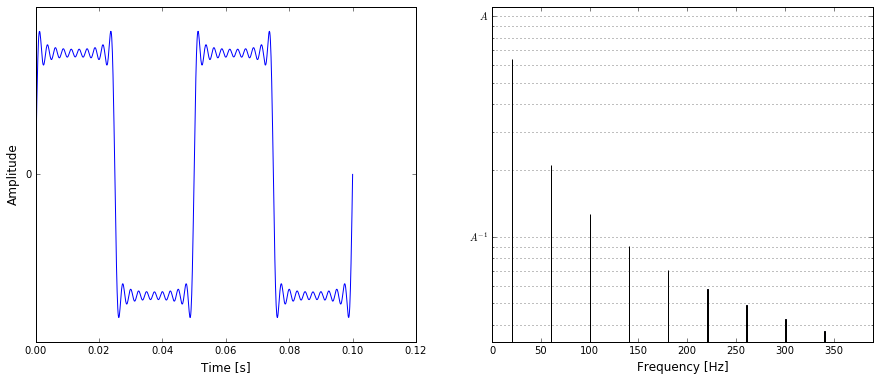

In [5]:
plot_time_frequency(square_wave, fre=20, n=10)

### Triangle wave:
$${\displaystyle
f(t) = -\frac{4}{\pi^2}\sum_{n=1}^{\infty}\frac{\mbox{cos}\left((2n-1)\omega t\right)}{(2n-1)^2},\quad \omega=\frac{2\pi}{T}
}$$
$${\displaystyle
f(t) = -\frac{4}{\pi^2}\left[
\frac{1}{1}\mbox{cos}\left(1\omega t\right) + 
\frac{1}{9}\mbox{cos}\left(3\omega t\right) + 
\frac{1}{25}\mbox{cos}\left(5\omega t\right) + 
\frac{1}{49}\mbox{cos}\left(7\omega t\right) + \cdots
\right]
}$$

In [6]:
def triangle_wave(t, fre, n=15):
    f = 0
    n = int(n)
    freqs = np.array([])
    amps = np.array([])
    for i in xrange(1, n+1):
        f -= (8 / pi**2) * (1.0 / (2*i-1)**2) * cos((2*i-1)*2*pi*fre*t)
        freqs = np.append(freqs, fre*(2*i-1))
        amps = np.append(amps, (4 / (pi*(2*i-1))**2))
    return f, freqs, amps

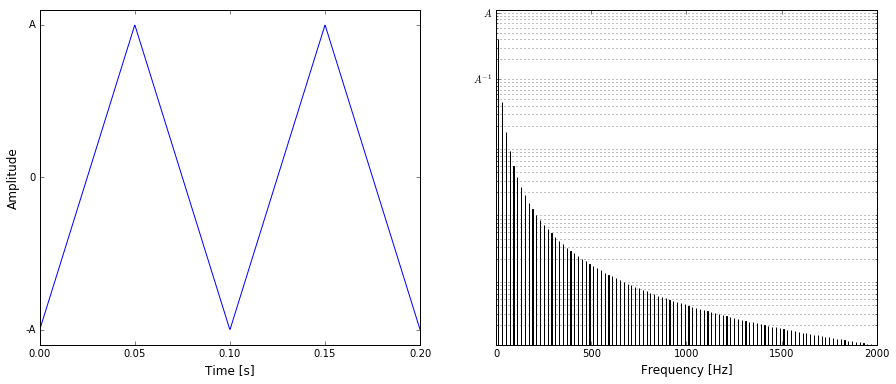

In [7]:
plot_time_frequency(triangle_wave, fre=10, n=100)

### Sawtooth wave:
$${\displaystyle
f(t) = \frac{4}{\pi}\sum_{n=1}^{\infty}\frac{\mbox{sin}\left(n\omega t\right)}{n},\quad \omega=\frac{2\pi}{T}
}$$
$${\displaystyle
f(t) = \frac{4}{\pi}\left[
\frac{1}{1}\mbox{sin}\left(1\omega t\right) + 
\frac{1}{2}\mbox{sin}\left(2\omega t\right) + 
\frac{1}{3}\mbox{sin}\left(3\omega t\right) + 
\frac{1}{4}\mbox{sin}\left(4\omega t\right) + \cdots
\right]
}$$

In [8]:
def sawtooth_wave(t, fre, n=15):
    f = 0
    n = int(n)
    freqs = np.array([])
    amps = np.array([])
    for i in xrange(1, n+1):
        f += (2 / pi) * (1.0 / i) * sin(i*2*pi*fre*t)
        freqs = np.append(freqs, fre*i)
        amps = np.append(amps, 1 / (pi * i))
    return f, freqs, amps

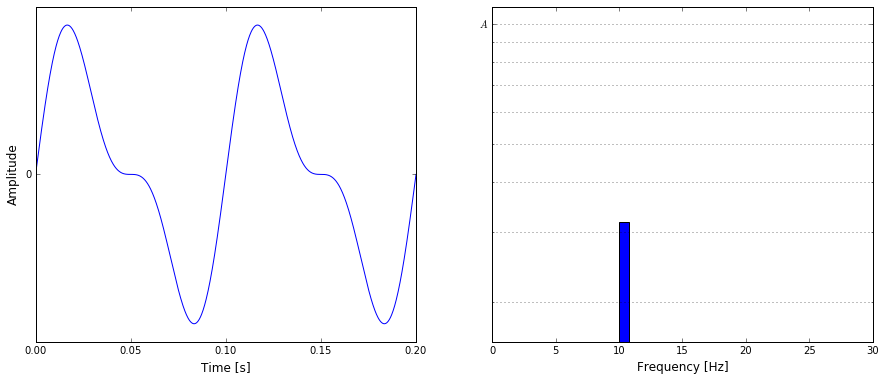

In [9]:
plot_time_frequency(sawtooth_wave, 10, n=2)

### Half wave rectified sinewave:
$${\displaystyle
f(t) = \frac{1}{\pi}+\frac{\mbox{sin}(\omega t)}{2}-
\frac{2}{\pi}\sum_{n=1}^{\infty}\frac{\mbox{cos}\left(2n\omega t\right)}{4n^2-1},
\quad \omega=\frac{2\pi}{T}
}$$
$${\displaystyle
f(t) = \frac{1}{\pi}+\frac{\mbox{sin}(\omega t)}{2}-\frac{2}{\pi}\left[
\frac{1}{3}\mbox{cos}\left(2\omega t\right) + 
\frac{1}{15}\mbox{cos}\left(4\omega t\right) + 
\frac{1}{35}\mbox{cos}\left(6\omega t\right) + 
\frac{1}{64}\mbox{cos}\left(8\omega t\right) + \cdots
\right]
}$$

In [10]:
def half_rectified_sine(t, fre, n=15):
    f = 1/pi + sin(2*pi*fre*t)/2
    n = int(n)
    freqs = np.array([fre])
    amps = np.array([0.5])
    if n < 2:
        return f, freqs, amps
    else:
        for i in xrange(1, n):
            f -= (2 / pi) * cos(i*4*pi*fre*t) / (4*i**2-1) 
            freqs = np.append(freqs, fre*i*2)
            amps = np.append(amps, 2 / (pi*(4*i**2-1)))
        return f, freqs, amps

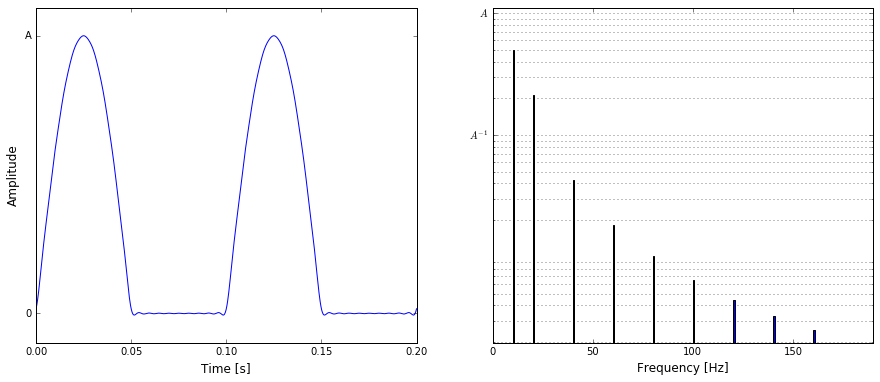

In [11]:
plot_time_frequency(half_rectified_sine, fre=10, n=10)

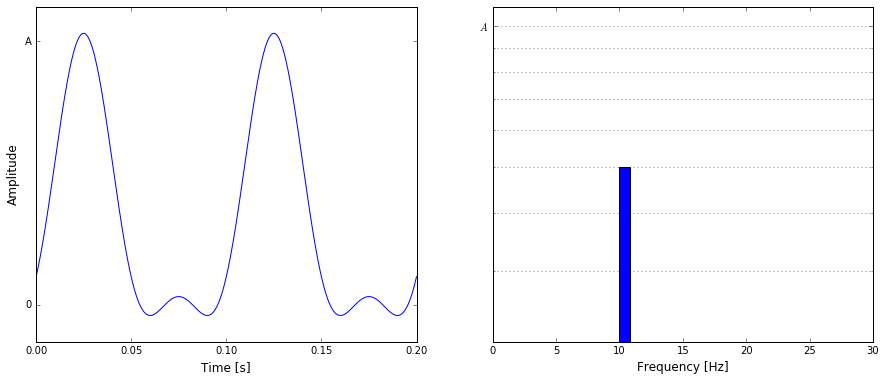

In [12]:
plot_time_frequency(half_rectified_sine, fre=10, n=2)

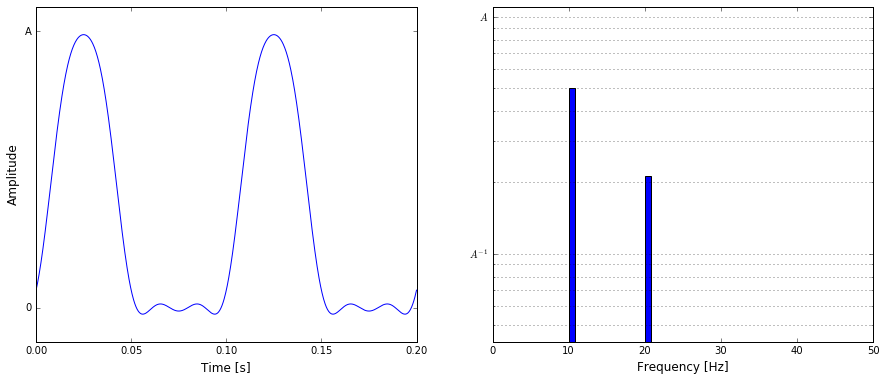

In [13]:
plot_time_frequency(half_rectified_sine, fre=10, n=3)

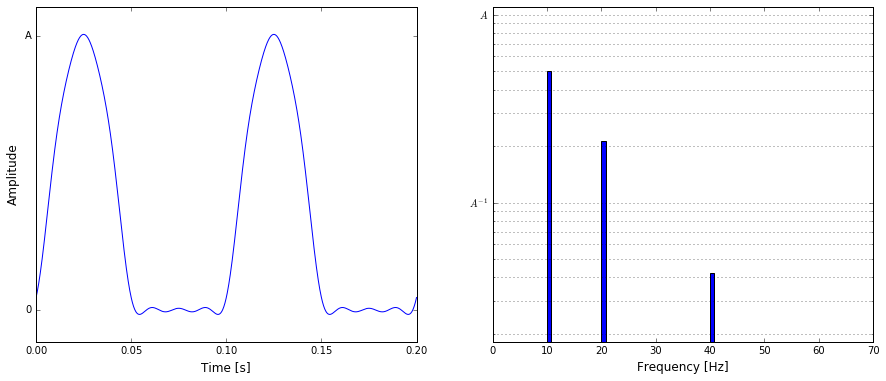

In [14]:
plot_time_frequency(half_rectified_sine, fre=10, n=4)

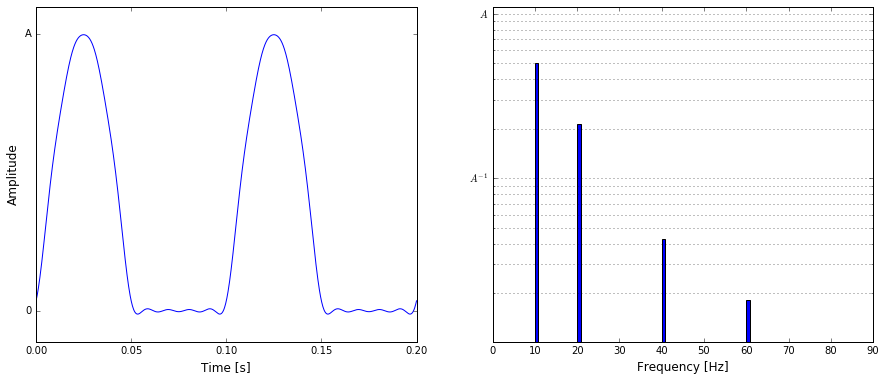

In [15]:
plot_time_frequency(half_rectified_sine, fre=10, n=5)

### Full wave rectified sine:
$${\displaystyle
f(t) = \frac{2}{\pi} - 
\frac{4}{\pi}\sum_{n=1}^{\infty}\frac{\mbox{cos}\left(n\omega t\right)}{4n^2-1},
\quad \omega=\frac{2\pi}{T}
}$$
$${\displaystyle
f(t) = \frac{2}{\pi}-\frac{4}{\pi}\left[
\frac{1}{3}\mbox{cos}\left(1\omega t\right) + 
\frac{1}{15}\mbox{cos}\left(2\omega t\right) + 
\frac{1}{35}\mbox{cos}\left(3\omega t\right) + 
\frac{1}{64}\mbox{cos}\left(4\omega t\right) + \cdots
\right]
}$$

In [17]:
def full_rectified_sine(t, fre, n=15):
    f = 2/pi
    n = int(n)
    freqs = np.array([0])
    amps = np.array([f])
    for i in xrange(1, n):
        f -= (4 / pi) * cos(i*2*pi*fre*t) / (4*i**2-1) 
        freqs = np.append(freqs, fre*i)
        amps = np.append(amps, 4 / (pi*(4*i**2-1)))
    return f, freqs, amps

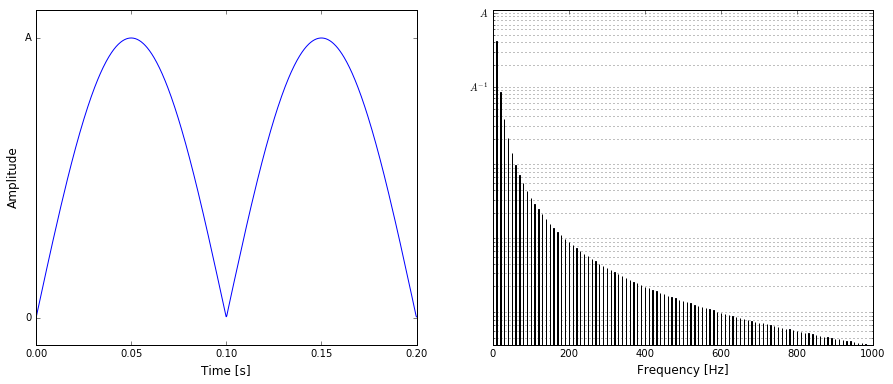

In [18]:
plot_time_frequency(full_rectified_sine, fre=10, n=100)

In [19]:
def sine_wave(t, fre, n):
    return sin(t*2*pi*fre), np.array([fre]), np.array([1])